In [1]:
#import neccessory libraries 
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import pandas as pd

## 9.1(1)

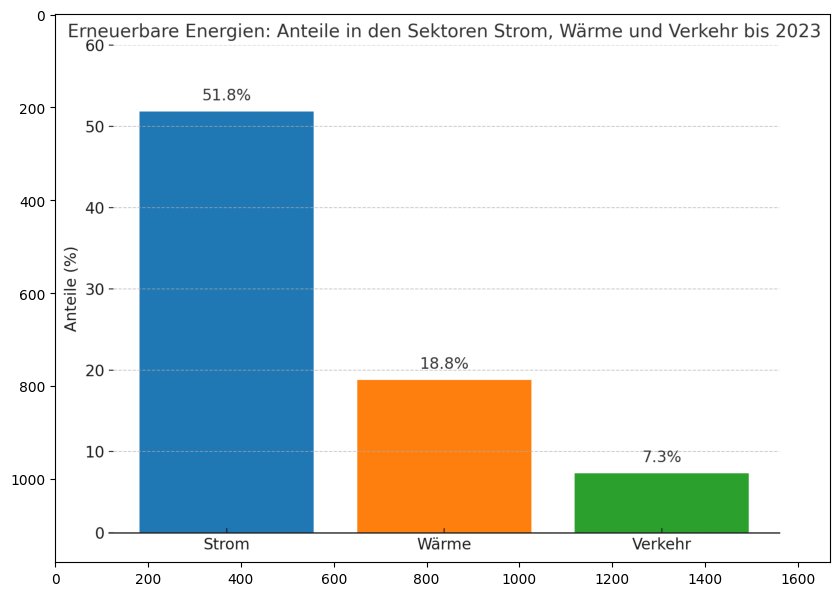

In [5]:
img = mpimg.imread('Energy (2).png') # provide the exact path to your image
plt.figure(figsize=(10,10)) # adjust as necessary
imgplot = plt.imshow(img)
plt.show()

## 9.1(2)

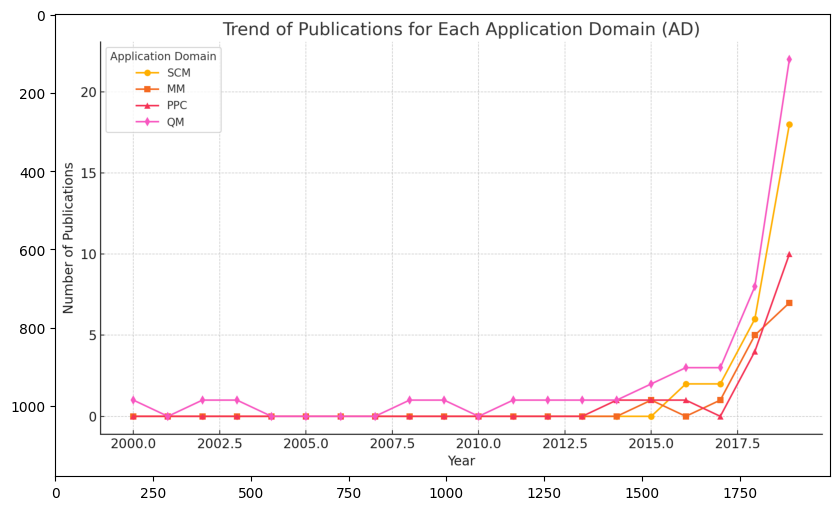

In [6]:
img = mpimg.imread('Machine_Learning.png') # provide the exact path to your image
plt.figure(figsize=(10,10)) # adjust as necessary
imgplot = plt.imshow(img)
plt.show()

## 9.2(1)

In [ ]:
# Load the file
file = np.load('smokers.npz')

# load array to your variable data
data = file['data']

person_data = data[4] # replace 4 with the index of person
print("Data of 5th person in our dat set: ")
print('Country:', person_data[0])
print('Smoker status (1 - Yes, 0 - No):', person_data[1])
print('Age at death:', person_data[2])

Data of 5th person in our dat set: 
Country: 4
Smoker status (1 - Yes, 0 - No): 0
Age at death: 57


## 9.2(2)

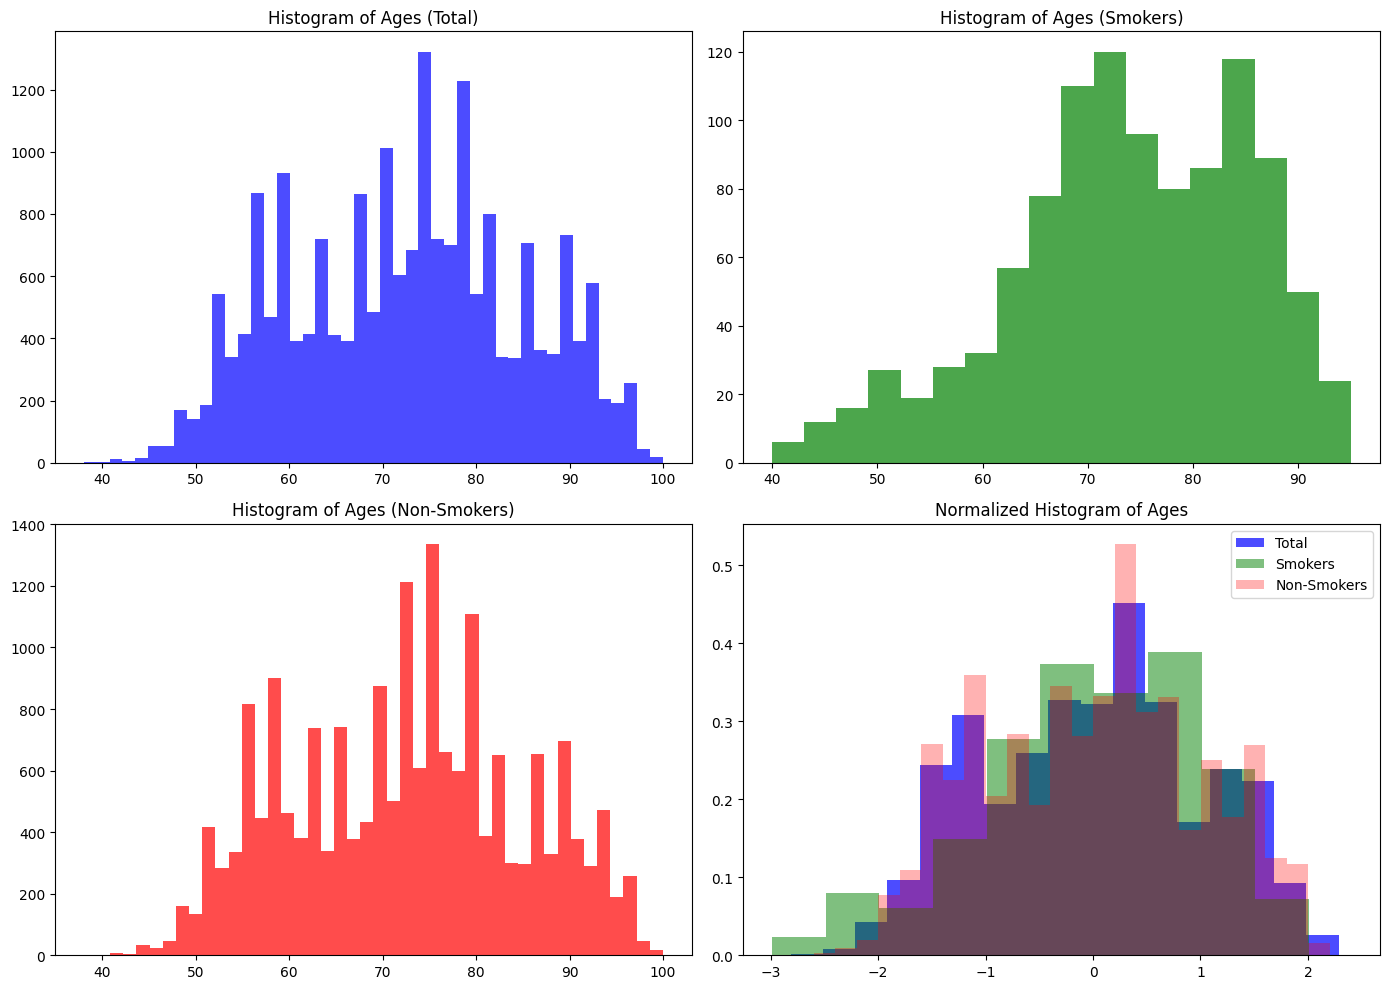

In [ ]:
# Separate data for total population, smokers and non-smokers
ages_total = data[:, 2]
ages_smokers = data[data[:, 1] == 1, 2]
ages_non_smokers = data[data[:, 1] == 0, 2]

# Create a subplot for four histograms
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot absolute count in each bin
axs[0, 0].hist(ages_total, bins='auto', color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram of Ages (Total)')
axs[0, 1].hist(ages_smokers, bins='auto', color='green', alpha=0.7)
axs[0, 1].set_title('Histogram of Ages (Smokers)')
axs[1, 0].hist(ages_non_smokers, bins='auto', color='red', alpha=0.7)
axs[1, 0].set_title('Histogram of Ages (Non-Smokers)')


# Plot normalized histogram where entries in all bins sum to 1
normal_ages_total=(ages_total-np.mean(ages_total))/np.std(ages_total)
normal_ages_smokers=(ages_smokers-np.mean(ages_smokers))/np.std(ages_smokers)
normal_ages_non_smokers=(ages_non_smokers-np.mean(ages_non_smokers))/np.std(ages_non_smokers)

# Define your desired bin widths
bin_width_total = 0.3
bin_width_smokers = 0.5
bin_width_non_smokers = 0.2

# Calculate number of bins for each histogram using desired bin width
bins_total = np.arange(np.min(normal_ages_total), np.max(normal_ages_total) + bin_width_total, bin_width_total)
bins_smokers = np.arange(np.min(normal_ages_smokers), np.max(normal_ages_smokers) + bin_width_smokers, bin_width_smokers)
bins_non_smokers = np.arange(np.min(normal_ages_non_smokers), np.max(normal_ages_non_smokers) + bin_width_non_smokers, bin_width_non_smokers)

# Create the histograms
axs[1, 1].hist(normal_ages_total, bins=bins_total, alpha=0.7, density=True, color='blue', label='Total')
axs[1, 1].hist(normal_ages_smokers, bins=bins_smokers, alpha=0.5, density=True, color='green', label='Smokers')
axs[1, 1].hist(normal_ages_non_smokers, bins=bins_non_smokers, alpha=0.3, density=True, color='red', label='Non-Smokers')
axs[1, 1].set_title('Normalized Histogram of Ages')
axs[1, 1].legend(loc='best')

# Display the plot
plt.tight_layout()
plt.show()

## 9.2(3)

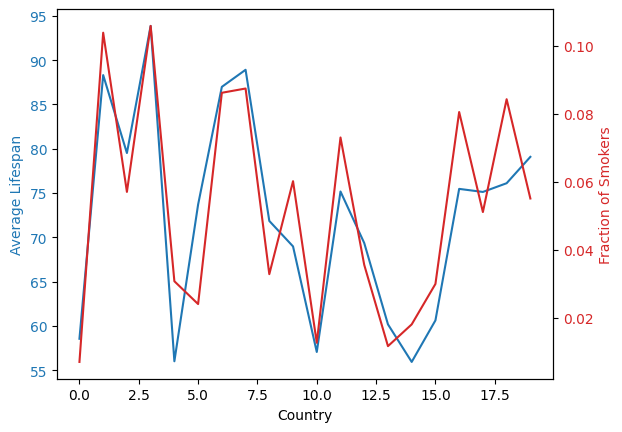

In [ ]:

# Get list of countries
countries = np.unique(data[:, 0])

# Initialize arrays for storing averages and smoker fractions
average_lifespans = []
smoker_fractions = []

# Loop over the countries
for country in countries:
    # Extract data for this country
    data_country = data[data[:, 0] == country]
    
    # Calculate and store average lifespan
    average_lifespans.append(np.mean(data_country[:, 2]))
    
    # Calculate and store smoker fraction
    smoker_fractions.append(np.sum(data_country[:, 1]) / len(data_country))

# Convert lists to arrays for easier manipulation
average_lifespans = np.array(average_lifespans)
smoker_fractions = np.array(smoker_fractions)

# Visualize the results

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot average lifespan
color = 'tab:blue'
ax1.set_xlabel('Country')
ax1.set_ylabel('Average Lifespan', color=color)
ax1.plot(countries, average_lifespans, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
# We've already handled the x-label with ax1
color = 'tab:red'
ax2.set_ylabel('Fraction of Smokers', color=color)
ax2.plot(countries, smoker_fractions, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display
plt.show()


## 9.2(4)

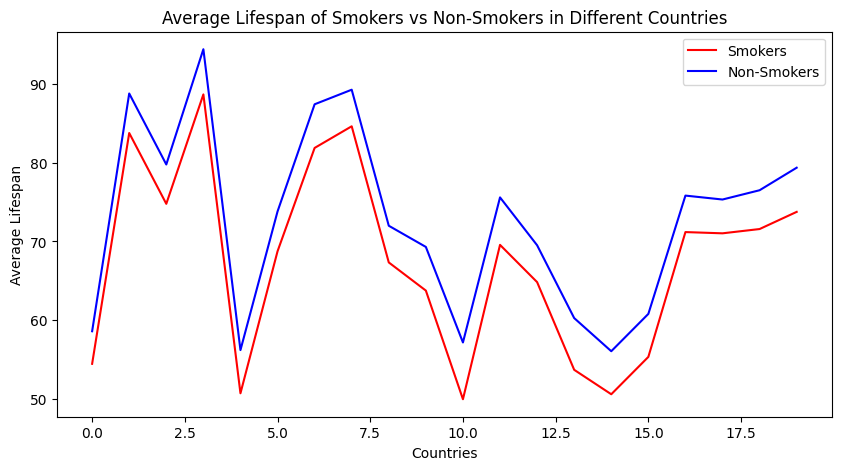

In [ ]:

# Get list of countries
countries = np.unique(data[:, 0])

# Initialize arrays for storing averages
lifespans_smokers = []
lifespans_non_smokers = []

# Loop over the countries
for country in countries:
    # Extract data for smokers and non-smokers in this country
    data_smokers = data[(data[:, 0] == country) & (data[:, 1] == 1)]
    data_non_smokers = data[(data[:, 0] == country) & (data[:, 1] == 0)]
    
    # Calculate and store average lifespan for smokers and non-smokers
    lifespans_smokers.append(np.mean(data_smokers[:, 2]))
    lifespans_non_smokers.append(np.mean(data_non_smokers[:, 2]))

# Convert lists to arrays for easier manipulation
lifespans_smokers = np.array(lifespans_smokers)
lifespans_non_smokers = np.array(lifespans_non_smokers)

# Visualize the results

plt.figure(figsize=(10, 5))
plt.plot(countries, lifespans_smokers, color='r', label='Smokers')
plt.plot(countries, lifespans_non_smokers, color='b', label='Non-Smokers')
plt.xlabel('Countries')
plt.ylabel('Average Lifespan')
plt.title('Average Lifespan of Smokers vs Non-Smokers in Different Countries')
plt.legend(loc='best')
plt.show()


## 9.2(5)

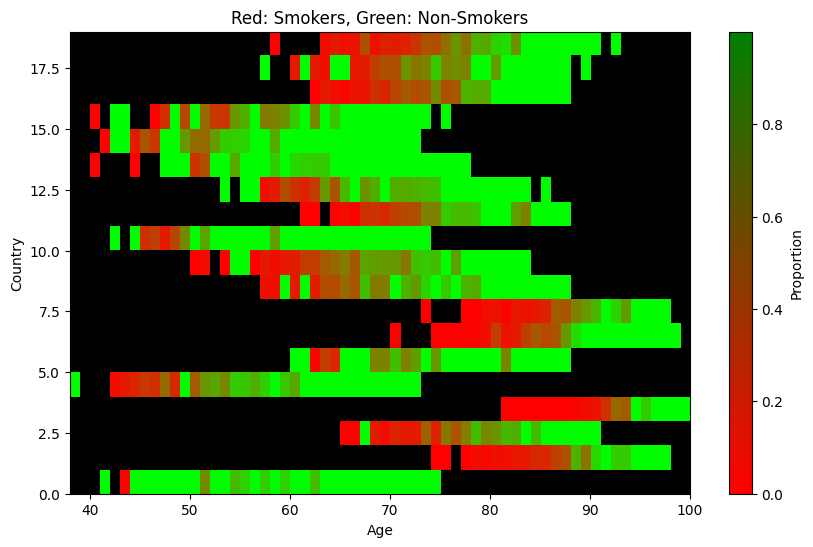

In [ ]:

# Set a colormap with Red for smokers and Green for non-smokers
cmap = LinearSegmentedColormap.from_list("custom", ['red', 'green'], N=256)

# Split the data into smokers and non-smokers
smokers = data[data[:, 1] == 1]
non_smokers = data[data[:, 1] == 0]

# Compute 2D histograms
bins_country = np.arange(20)  # Assuming 20 countries labeled 0-19
bins_age = np.arange(np.min(data[:, 2]), np.max(data[:, 2]) + 1)

hist_smokers, _, _ = np.histogram2d(smokers[:, 0], smokers[:, 2], bins=(bins_country, bins_age))
hist_non_smokers, _, _ = np.histogram2d(non_smokers[:, 0], non_smokers[:, 2], bins=(bins_country, bins_age))

# Normalize histograms to make them represent proportions
hist_smokers /= np.sum(hist_smokers)
hist_non_smokers /= np.sum(hist_non_smokers)

# Create an RGB image where red channel is smokers and green channel is non-smokers
# Adding an small epsilon to avoid division by zero during normalization
epsilon = 1e-7
combined_hist = hist_smokers + hist_non_smokers + epsilon
img = np.stack([(hist_smokers / combined_hist), (hist_non_smokers / combined_hist), np.zeros_like(hist_smokers)], axis=-1)

# Show the image
plt.figure(figsize=(10, 6))
plt.imshow(img, origin='lower', aspect='auto', extent=[bins_age[0], bins_age[-1], bins_country[0], bins_country[-1]], cmap=cmap)

# Adding colorbar and labels
plt.colorbar(label='Proportion')
plt.xlabel('Age')
plt.ylabel('Country')
plt.grid(False)
plt.title('Red: Smokers, Green: Non-Smokers')

plt.show()


## 9.2(6)

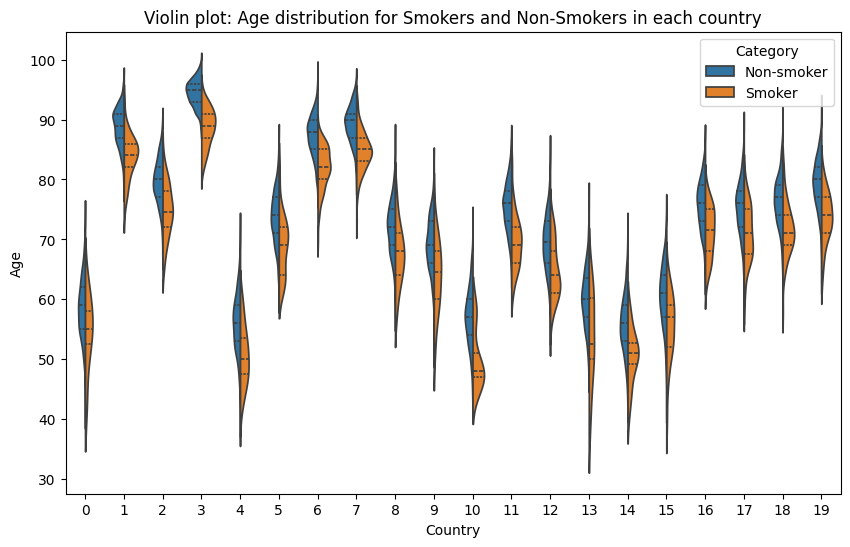

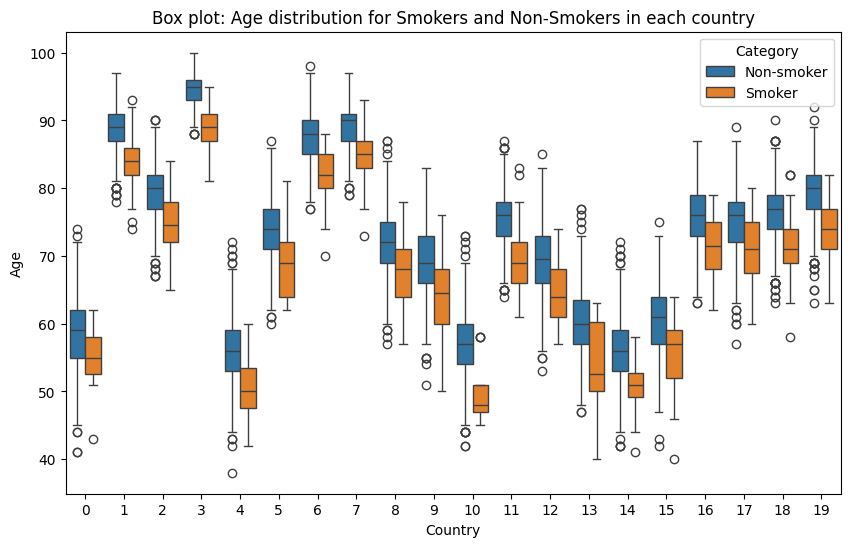

In [ ]:
# Converting numpy array to a pandas DataFrame
df = pd.DataFrame(data, columns=['Country', 'Smoker', 'Age'])

# Replace 'Smoker' column with 'Category'
df['Category'] = df['Smoker'].map({0 : 'Non-smoker', 1 : 'Smoker'})

plt.figure(figsize=(10,6))

# Creating seaborn violinplot
sns.violinplot(x='Country', y='Age', hue= 'Category', split=True, inner="quartile", data=df)
plt.title('Violin plot: Age distribution for Smokers and Non-Smokers in each country')
plt.show()

# Alternatively, creating seaborn boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='Age', hue= 'Category', data=df)
plt.title('Box plot: Age distribution for Smokers and Non-Smokers in each country')
plt.show()

## 9.3(1)

In [ ]:
# Load the file containing the arrays
file = np.load('salaries.npz')

#  print all the arrays in the npz file
print(file.files)

# load arrays to your variables
salaries = file['salaries']
inflation_factors = file['inflation_factors']

# Now, we can work with the data
print(salaries[1])
print(inflation_factors[1])

['salaries', 'inflation_factors']
[266839.58524263 262431.85323003 278434.95443072 298352.57958175
 300121.29445265 314027.01586259 337214.08538379 345061.3261646
 351515.68490366 348267.24920799 376698.37793384 398083.79218703
 420883.74329353 451001.78573086 491490.84197552 488110.50060494
 526466.29718471 522820.57627033 552927.21712564 569735.58287191]
1.0999999999999899


## 9.3(2)

In [ ]:


deflated_value = np.ones(20)

for i in range(1, len(inflation_factors)):
    deflated_value[i] = deflated_value[i-1] / (1 + inflation_factors[i-1] * 0.01)

# Print the deflated values for each year
for i in range(len(deflated_value)):
    year = 2001 + i
    print(f"The deflated value of one Euro in {year} is {deflated_value[i]:.4f} Euros in terms of 2001 Euros.")

The deflated value of one Euro in 2001 is 1.0000 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2002 is 0.9872 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2003 is 0.9764 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2004 is 0.9601 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2005 is 0.9459 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2006 is 0.9310 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2007 is 0.9101 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2008 is 0.8870 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2009 is 0.8844 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2010 is 0.8747 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2011 is 0.8568 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2012 is 0.8400 Euros in terms of 2001 Euros.
The deflated value of one Euro in 2013 is 0.8284 Eur

## 9.3(3)

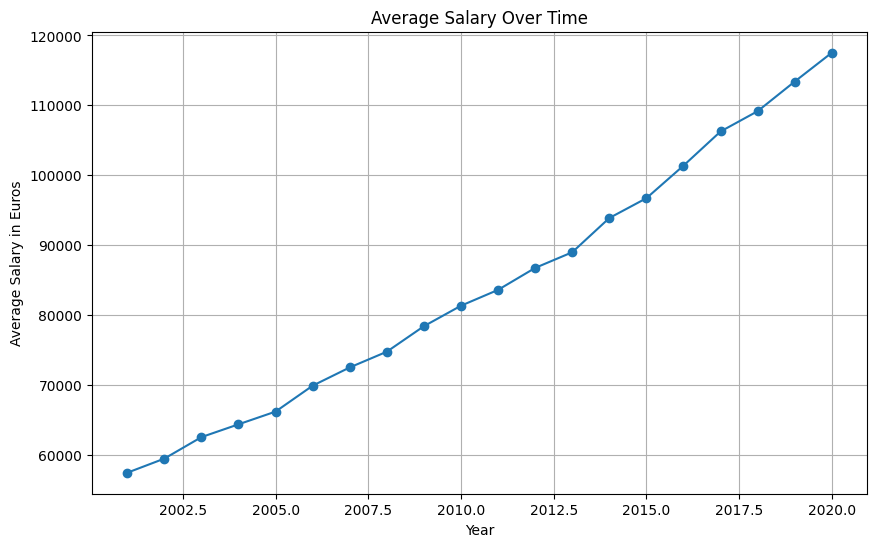

In [ ]:
# Calculate the average salary for each year
average_salaries = np.mean(salaries, axis=0)

# Generate an array for the years
years = np.arange(2001, 2021)

# Plot the average salary over time
plt.figure(figsize=(10,6))
plt.plot(years, average_salaries, marker='o')
plt.title('Average Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary in Euros')
plt.grid()

plt.show()


## 9.3(4)

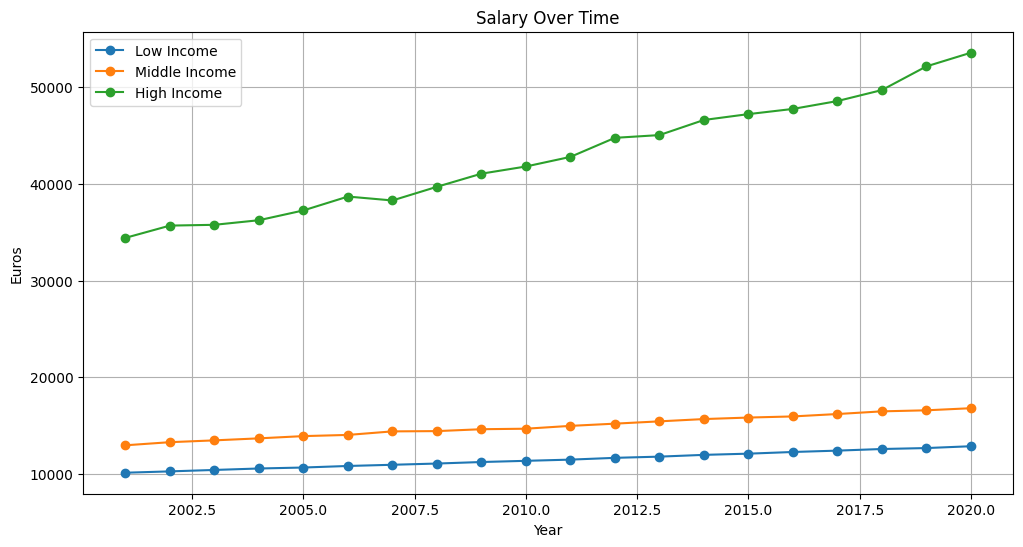

In [ ]:
# Calculate percentiles of salary for each year
low_income = np.percentile(salaries, 25, axis=0)  # 25th percentile (lower quartile)
middle_income = np.percentile(salaries, 50, axis=0)  # 50th percentile (median)
high_income = np.percentile(salaries, 75, axis=0)  # 75th percentile (upper quartile)

# Generate an array for the years
years = np.arange(2001, 2021)

# Plot the average salary over time for different income groups
plt.figure(figsize=(12,6))

plt.plot(years, low_income, marker='o', label='Low Income')
plt.plot(years, middle_income, marker='o', label='Middle Income')
plt.plot(years, high_income, marker='o', label='High Income')

plt.title('Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Euros')
plt.legend()
plt.grid()

plt.show()